# A1.1 Numerical Integration: Finite Difference Methods
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.1.1 Motivation

We will see that many examples encountered in Physics I 
come with assumptions that makes them less applicable to everyday life.
While these examples are great at illustrating important concepts, they fail
in providing accurate prediction for real-life examples. When these
assumptions are not valid, our problems often become too difficult to obtain
exact solutions for, and our best effort is to provide approximate solutions
that are correct to within a set acceptable error margin.

As an example, Newton's second law is a second order differential equation, which in many real-life applications is non-linear and only solveable through numerical methods. Under certain situations, we can transform it into coupled first order differential equations that can be solved by numerical integration methods. The objective of this note is to obtain these numerical integration schemes known as **finite difference methods**. 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.1.2 Linearization

Let us consider the graphical setup below. Assume that we have
knowledge of a data point with
coordinates $[x_0,f(x_0)]$ of a function
$f(x)$, and we desire knowledge about
a point P with coordinates $[x, f(x)]$ in
close proximity to the data point. 

<img src="A1-fig1.png" width="400">

In the Figure, the blue line represents the function $f(x)$ and the red line is the tangent line at point $[x_0,f(x_0)]$, which is the best linear
representation of the function at that point. The tangent line is represented
by the linear equation (think of the intercept/rise form: $y = A + Bx$):

<div class="alert alert-success">
    
$$ L(x) = f(x_0) + \left.\frac{df}{dx}\right|_{x = x_0}(x - x_0) \tag{1}$$
</div>

If we use this equation to approximate the function $f(x)$ at point P, we call $L(x)$ **the
linearization** or the linear approximation of $f(x)$. From the figure, we can see
that our guess $L(x)$ for $f(x)$ at point P is only an approximation and we introduce an
error with this approximation. A good, and very important, question would
be: how big is this error? We will provide a more rigorous approach next that will help us answer that question.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.1.3 Taylor Series

Calculus tells us that if we have a well-behaved function, the function can be written as the sum of an infinite series of polynomials called the **Taylor series** provided we have information about the function at some point $x = a$:

$$ f(x) = f(a) + (x-a)\left.\frac{df}{dx}\right |_{x = a} + \frac{(x-a)^2}{2!}\left.\frac{d^{2}f}{dx^2}\right|_{x = a}
+ \frac{(x-a)^3}{3!}\left.\frac{d^{3}f}{dx^3}\right |_{x = a} + \cdots $$

With our notation in the above discussion of linearization, we have information about a point $x = x_0$, so let us re-write the Taylor series using $x_0$ insted of $a$:

$$ f(x) = f(x_0) + (x-x_0)\left.\frac{df}{dx}\right |_{x = x_0} + \frac{(x-x_0)^2}{2!}\left.\frac{d^{2}f}{dx^2}\right|_{x = x_0}
+ \frac{(x-x_0)^3}{3!}\left.\frac{d^{3}f}{dx^3}\right |_{x = x_0} + \cdots $$

I am introducing this notation, since we are more familiar with writing the difference in $x$ as $\Delta x = x - x_0$. If we introduce this notation into our Taylor series, we get (note: $x = x_0 + \Delta x$):

$$ f(x_0 + \Delta x) = f(x_0) + (\Delta x)\left.\frac{df}{dx}\right |_{x = x_0} + \frac{(\Delta x)^2}{2!}\left.\frac{d^{2}f}{dx^2}\right|_{x = x_0}
+ \frac{(\Delta x)^3}{3!}\left.\frac{d^{3}f}{dx^3}\right |_{x = x_0} + \cdots $$

At this point, we have not done anything other than re-write the Taylor series using different notation. However, it may be more evident now **that our left hand-side of the equation is the function $f(x)$ evaluated at a point ahead of $x$ by using information about the function at $x_0$ only**. That is actually pretty cool!

If the above feels overwhelming, please do not panic! I am only showing these steps towards our numericale scheme such that those of you with the mathematical confidence can see what is behind the door. The focus in the class will be on applying the numerical scheme, which is ahead of us yet.

### Mathematical Trick
We will now make some tricks, or just plain arithmetic: subract $f(x_0)$ on both sides of the equation and divide by $\Delta x$ through all terms:

$$ \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x} = \left.\frac{df}{dx}\right |_{x = x_0} + \frac{(\Delta x)}{2!}\left.\frac{d^{2}f}{dx^2}\right|_{x = x_0}
+ \frac{(\Delta x)^2}{3!}\left.\frac{d^{3}f}{dx^3}\right |_{x = x_0} + \cdots $$

### Truncation
The next step is to truncate the expression to only include the first derivative term (truncation simply refers to the fact that we are only considering a limited number of terms in the infinite series):

<div class="alert alert-success">
    
$$ \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x} \sim \left.\frac{df}{dx}\right |_{x = x_0} \tag{2}$$
</div>

Notice that we change the "=" to "~" since we are now approximating it. We also notice that this approximation is similar to the linearization in Equation (1). However, there is one important element that sets the two
approaches apart. Whereas the error in the linearization was unknown,
the Taylor expansion approach provides us with an order of magnitude
estimation of the error! 

Each successive term in the Taylor
expansion is smaller than the previous (a requirement for mathematical convergence), and
as such, our largest term that we ignored in the approximation above was 

$$ \frac{(\Delta x)}{2!}\left.\frac{d^{2}f}{dx^2}\right|_{x = x_0} $$

**Hence, the error in our approximation is $\mathcal{O}(\Delta x)$** (read as: order of magnitude $\Delta x$).

### Question
Professor, why go through these lengthy steps to obtain our rise/run
approximation for the derivative?

### Answer
This is the simplest approximation
(linear), but we could have truncated the Taylor expansion further down
and obtained more accurate approximations (for example $\mathcal{O}(\Delta x)^2$. We will do that as a box
exercise. **The above processes in using Taylor expansions to obtain approximations for derivatives are called finite difference methods**.

### Question
This is not in my textbook and I do not feel this is physics. Why do I need to know this?

### Answer
Because it is an important element to solve realistic physics problems, and often the only way of doing it. As physicists and engineers, you do not get very far in real life by always ignoring friction or non-linear properties of materials. In software engineering, you will have to deal with discrete math and solving methods. A game engine, for example, is full of numerical methods.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## A1.1.4 First Order Forward Finite Difference Method

The approximation for the derivative we obtained in Equation (2) is known
as the **first order derivative forward finite difference method**. It is forward since we are applying knowledge
of our data point $x_0$ to obtain information about a point $x$ laying ahead (or forward) of
$x_0$ (see figure in section 1).

When we apply this method to update the value $f(x)$ based on the known
value $f(x_0)$, it is often more convenient to write it in subscript form (this
notation is also more intuitive with respect to implementing it into a
computer script):

$$ \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x} \sim \left.\frac{df}{dx}\right |_{x = x_0} $$

$$ \frac{f(x_{i+1}) - f(x_i)}{x_{i+1}- x_i} \sim \left.\frac{df}{dx}\right |_{x = x_i} $$

<div class="alert alert-success">
    
$$ \frac{f_{i+1} - f_i}{x_{i+1}- x_i} \sim \left.\frac{df}{dx}\right |_{x = x_i} \tag{3} $$
</div>

Equation (3) is the form we will implement as our numerical tool. While it would be great if you understand all the steps above, it is certainly not a requirement in this course. The applications are the essential and we will see some examples now.

<div class="alert alert-info">
    
Given a single data point $[x_0, f(x_0)]$ and a **model** for the derivative, we can make discrete **linear** steps to obtain a solution:
    
$$ f_{i+1} = f_i + f_{i}'\Delta x$$
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">       
<header>
<h3> Example 1</h3>
    </header>
    
We will consider a simple differential equation that we can solve analytical
as well to demonstrate the use of the forward finite difference method.
Consider the following differential equation with the condition that $(y_0, x_0)
= (0,0)$:

$$ \frac{dy}{dx} = x^2 $$

**Question**: Find the solution $y(x)$ at $x = 5$.

We can utilize differentials to cast it into integration form with solution

$$ y(x) = \frac{x^3}{3} $$

If we evaluate at $x = 5$ we get: 

<img src="A1-fig2.png" width="300">


Now let us try and solve it through numerical integration!

According to Equation (3), we can approximate the derivative by

$$ \left.\frac{df}{dx}\right |_{x = x_i} \sim \frac{f_{i+1} - f_i}{x_{i+1}- x_i} $$

In our case, the dependent variable is $y$ and not $f$:

$$ \left.\frac{dy}{dx}\right |_{x = x_i} \sim \frac{y_{i+1} - y_i}{x_{i+1}- x_i} $$

In the numerical approach, we will start at our initial data point $(y_0, x_0)
= (0,0)$ and progress towards $x = 5$ in chosen steps of $\Delta x = x_{i+1} - x_i$. We call $\Delta x$ the **step size** and the process is called an **iterative process**. 

Note: in a computational physics
course, we would learn more about how to make a proper choice regarding
this step size to obtain the most accurate solution without jeopardizing computer speed, but it is beyond the scope of this course.

The next step is to replace the derivative in our differential equation with the approximation:

$$ \frac{y_{i+1} - y_i}{x_{i+1}- x_i} =  x_{i}^2$$

**Important: the variable $x$ on the right side of the equation now got a subscript "i" attached to it. The reason is that we assume knowledge of $x$ and $y$ at our initial point. We must have this initial point to start the iteration**!

We have now converted a differential equation (continuous) into discrete equation that can be solved by arithmetic. Solving for our next $y$ value:

<div class="alert alert-success">
    
$$ y_{i+1} = y_i +  x_{i}^{2}\Delta x$$
</div>

We call this our **iterative equation** and is the equation we will use to step forward in $x$ until we reach $x = 5$. 
Let’s try and iterate it in the interval $x = [0,5]$ in step sizes of 1:

| x | y |
| :-- | :-- |
| <img width=100/> | <img width=600/> |
| $x_0 = 0$ | $y_0 = 0$ |
| $x_1 = 1$ | $y_1 = y_0 + x_{0}^2\Delta t = 0 + (0)^2(1) = 0 $ |
| $x_2 = 2$ | $y_2 = y_1 + x_{1}^2\Delta t = 0 + (1)^2(1) = 1 $ |
| $x_3 = 3$ | $y_3 = y_2 + x_{2}^2\Delta t = 1 + (2)^2(1) = 5 $ |
| $x_4 = 4$ | $y_4 = y_3 + x_{3}^2\Delta t = 5 + (3)^2(1) = 14 $ |
| $x_5 = 5$ | $y_5 = y_4 + x_{4}^2\Delta t = 14 + (4)^2(1) = 30 $ |

<div class="alert alert-success">
    
Our numerical solution is $y = 30$ at $x = 5$
</div>

A quick comparison between the analytical solution (42) and the numerical (30) will tell us that we are quite
a bit off. However, we used a large step
size ($\Delta x = 1$), and the function is changing
significantly over this large step size. **We
should choice a step size over which the function is not varying significantly**. Let us try and repeat the process with a stepsize of $\Delta x = 0.1$:

| x | y |
| :-- |  :-- |
| <img width=100/> | <img width=600/> |
| $x_0 = 0$ |  $y_0 = 0$ |
| $x_1 = 0.1$ |  $y_1 = y_0 + x_{0}^2\Delta t = 0 + (0)^2(1) = 0 $ |
| $x_2 = 0.2$ | $y_2 = y_1 + x_{1}^2\Delta t = 0 + (0.1)^2(1) = 0.01 $ |

Hold on! I will have to do this about 50 times. No way, dude! Python to the rescue:
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = 0
y = 0

dx = 0.1

x_f = 5.
nSteps = int(x_f/dx)

for i in range(nSteps):
    y = y + (x**2)*dx
    x = x + dx
print('Numerical Solution: '+str(y))

Numerical Solution: 40.42500000000002


<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">       

That is pretty close. In fact, the percent error is:

$$\textrm{percent error} = \frac{|\textrm{Numerical} - \textrm{Analytic}|}{\textrm{Analytic}}\times 100\% = \frac{|40.425 - 42|}{42}*100\% = 3.8\%$$

We could anticipate this great result since we know the error is comparable to $\Delta x$ (we know this from the Taylor truncation error), and since we chose $\Delta x = 0.1$, we would anticipate an error of the order of $\sim 1\%$.

Let us visualize the analytic and numerical solutions:
</div>

Numerical Solution: 40.42500000000002


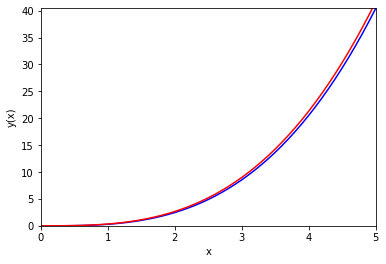

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Analytic solution
t = np.arange(0,5.1,0.1)
f = t**3/3.

# Numerical solution

x = [0]
y = [0]

dx = 0.1

x_f = 5.
nSteps = int(x_f/dx)

for i in range(nSteps):
    y.append(y[i] + (x[i]**2)*dx)
    x.append(x[i] + dx)
print('Numerical Solution: '+str(y[nSteps]))

# Plotting

plt.figure()
plt.ylabel('y(x)')
plt.xlabel('x')
ax = plt.gca()
ax.plot(x,y,'b')
ax.plot(t,f, 'r')

ax.set_xlim([np.min(x), np.max(x)])
ax.set_ylim([np.min(y), np.max(y)])

plt.show()


<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">       

Here we can see how good our numerical solution (blue) is compared to the actual solution (red). Isn't this amazing? We can apply this approach to a variety of complex physics problems, that we otherwise could not cover in Physics I. We will get practice using this approach and by the end of the semester, I hope we have a much better appreciation for it.

Now it is your turn to try it! Below is one Box problem for you to test your skills on this subject. I will make a separate note, where there is a brief summary and some sort of guide on how to approach these problems. I guess we can call it a solving strategy :)

As a final note: the approach above is the **first order forward finite difference method**. We could also work backwards with the Taylor expansion to obtain the **backward finite difference method**. This method is used when we need to gain information about points prior to our known data point. Finally, we can combine the two and obtain the **central finite difference method**, which differ by having an order of magnitude smaller error. We will not be employing either of the two, but if you are curious, check out 

* [Finite Difference](https://en.wikipedia.org/wiki/Finite_difference)
* [Finite Difference Method](https://en.wikipedia.org/wiki/Finite_difference_method)
</div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 1</b><br>
    
Consider the differential equation
    
$$ \frac{dy}{dx} = x^3 $$ 
  
Find the solution $y(x)$ at $x = 5$ if we know that $(x_0, y_0) = (0,2)$. What is the percent error between the analytical and numerical solutions? Create a plot showing the analytical and numerical solution.
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">